# Importando Bibliotecas

In [2]:
# Ignorar avisos 
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

## Carragando o Banco de Dados

In [4]:
df = pd.read_csv('DelayedFlights.zip')

Mostrar todas as colunas

In [5]:
pd.set_option('display.max_columns', 30)
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


O que representa cada coluna:

**Year:** O ano da data do voo.

**Month:** O mês da data do voo.

**DayofMonth:** O dia do mês da data do voo.

**DayOfWeek:** O dia da semana da data do voo (1 para segunda-feira, 2 para terça-feira, e assim por diante).

**DepTime:** A hora de partida real do voo (formato HHMM).

**CRSDepTime:** A hora de partida programada do voo (formato HHMM).

**ArrTime:** A hora de chegada real do voo (formato HHMM).

**CRSArrTime:** A hora de chegada programada do voo (formato HHMM).

**UniqueCarrier:** O código do transportador aéreo.

**FlightNum:** O número do voo.

**TailNum:** O número de cauda da aeronave.

**ActualElapsedTime:** O tempo real de voo em minutos.

**CRSElapsedTime:** O tempo de voo programado em minutos.

**AirTime:** O tempo real no ar em minutos.

**ArrDelay:** O atraso na chegada em minutos.

**DepDelay:** O atraso na partida em minutos.

**Origin:** O aeroporto de origem do voo.

**Dest:** O aeroporto de destino do voo.

**Distance:** A distância percorrida em milhas.

**TaxiIn:** O tempo desde que a aeronave começa a se mover na pista até o momento em que efetivamente decola. Antes da decolagem

**TaxiOut:** O tempo desde que a aeronave toca o solo até chegar ao portão de desembarque no pouso.

**Cancelled:** Indica se o voo foi cancelado (1 para sim, 0 para não).

**CancellationCode:** O código de cancelamento, se o voo foi cancelado. Sendo A = transportadora, B = clima, C = NAS(National Airspace System), D = segurança

**Diverted:** Indica se o voo foi desviado (1 para sim, 0 para não).

**CarrierDelay:** O tempo de atraso atribuído à companhia aérea em minutos.

**WeatherDelay:** O tempo de atraso atribuído ao clima em minutos.

**NASDelay:** O tempo de atraso atribuído ao Sistema Nacional de Aviação em minutos.

**SecurityDelay:** O tempo de atraso atribuído à segurança em minutos.

**LateAircraftDelay:** O tempo de atraso atribuído à aeronave em minutos.


In [6]:
df['Year'].unique() # só ha valores de 2008

array([2008], dtype=int64)

In [7]:
# Excluindo a primeira coluna
df = df.drop(df.columns[:1], axis=1)

In [8]:
# Excluindo colunas que não serão utilizadas na análise
df.drop(['Year','TaxiIn', 'TaxiOut', 'TailNum', 'FlightNum', 'UniqueCarrier',
        'DepTime', 'CRSDepTime','ArrTime','CRSArrTime'], # horários
                       axis=1, inplace=True)

In [9]:
df.shape

(1936758, 19)

In [10]:
df.nunique()

Month                  12
DayofMonth             31
DayOfWeek               7
ActualElapsedTime     673
CRSElapsedTime        515
AirTime               650
ArrDelay             1128
DepDelay             1058
Origin                303
Dest                  304
Distance             1419
Cancelled               2
CancellationCode        4
Diverted                2
CarrierDelay          983
WeatherDelay          599
NASDelay              574
SecurityDelay         156
LateAircraftDelay     564
dtype: int64

Verificar a quantidade de linhas com valores nulos

In [11]:
df.isnull().sum().sort_values(ascending=False)

LateAircraftDelay    689270
SecurityDelay        689270
NASDelay             689270
WeatherDelay         689270
CarrierDelay         689270
ActualElapsedTime      8387
AirTime                8387
ArrDelay               8387
CRSElapsedTime          198
CancellationCode          0
Diverted                  0
Month                     0
Cancelled                 0
Distance                  0
DayofMonth                0
Origin                    0
DepDelay                  0
DayOfWeek                 0
Dest                      0
dtype: int64

In [12]:
print('Verificando se há valores de tempo negativos')
print('ActualElapsedTime',len(df[df['ActualElapsedTime']<0]['ActualElapsedTime']))
print('CRSElapsedTime',len(df[df['CRSElapsedTime']<0]['CRSElapsedTime']))
print('AirTime',len(df[df['AirTime']<0]['AirTime']))

Verificando se há valores de tempo negativos
ActualElapsedTime 0
CRSElapsedTime 6
AirTime 0


In [13]:
print('Verificando se há valores de tempo zerados ou negativos')
print('ActualElapsedTime',len(df[df['ActualElapsedTime']<=0]['ActualElapsedTime']))
print('CRSElapsedTime',len(df[df['CRSElapsedTime']<=0]['CRSElapsedTime']))
print('AirTime',len(df[df['AirTime']<=0]['AirTime']))

Verificando se há valores de tempo zerados ou negativos
ActualElapsedTime 0
CRSElapsedTime 6
AirTime 7


- 'CRSElapsedTime' registra o tempo de voo programado em minutos, valores negativos são valores incosistentes, logo, precisam ser retirados.

In [14]:
df = df[df['CRSElapsedTime']>=0]

Valores Zerados ou são de voos cancelados ou são registros errados

In [16]:
# Filtrando voos não cancelados
voos_n_cancelados = df[df['Cancelled']==0]
# como já foi retirado os cancelados, não precisa manter a coluna de cancelados e seus motivos
voos_n_cancelados.drop(['Cancelled','CancellationCode'],axis=1, inplace=True)



In [17]:
print('Verificando se há valores de tempo zerados ou negativos')
print('ActualElapsedTime',len(voos_n_cancelados[voos_n_cancelados['ActualElapsedTime']<=0]['ActualElapsedTime']))
print('CRSElapsedTime',len(voos_n_cancelados[voos_n_cancelados['CRSElapsedTime']<=0]['CRSElapsedTime']))
print('AirTime',len(voos_n_cancelados[voos_n_cancelados['AirTime']<=0]['AirTime']))

Verificando se há valores de tempo zerados ou negativos
ActualElapsedTime 0
CRSElapsedTime 0
AirTime 7


como o AirTime ainda apareceu valores inconsistentes, foram retirados do df

In [18]:
voos_n_cancelados = voos_n_cancelados[voos_n_cancelados['AirTime']>0]

In [19]:
# verificando se foram retirados todos os dados zerados nas colunas especificadas
print('Verificando se há valores de tempo zerados')
print('ActualElapsedTime',len(voos_n_cancelados[voos_n_cancelados['ActualElapsedTime']<=0]['ActualElapsedTime']))
print('CRSElapsedTime',len(voos_n_cancelados[voos_n_cancelados['CRSElapsedTime']<=0]['CRSElapsedTime']))
print('AirTime',len(voos_n_cancelados[voos_n_cancelados['AirTime']<=0]['AirTime']))

Verificando se há valores de tempo zerados
ActualElapsedTime 0
CRSElapsedTime 0
AirTime 0


Voos que não sofreram atrasos são caracterizados por valores nulos nas colunas que demonstram qualquer tipo de atraso (LateAircraftDelay, SecurityDelay, NASDelay, WeatherDelay e CarrierDelay), e, consequentemente, esses valores serão substituídos por 0.

Já os voos desviados são aqueles que foram parcialmente cancelados, indicando que o voo não seguiu até o destino originalmente planejado. Nesse caso, métricas como tempo de voo e tempo no ar podem não ser aplicáveis, pois o voo não foi concluído conforme o planejado, e, portanto, também serão substituídas por 0.

In [20]:
voos_n_cancelados.fillna(0, inplace=True)

In [21]:
voos_n_cancelados.isnull().sum().sort_values(ascending=False) # conferindo se foram retirados os valores nulos

Month                0
Dest                 0
SecurityDelay        0
NASDelay             0
WeatherDelay         0
CarrierDelay         0
Diverted             0
Distance             0
Origin               0
DayofMonth           0
DepDelay             0
ArrDelay             0
AirTime              0
CRSElapsedTime       0
ActualElapsedTime    0
DayOfWeek            0
LateAircraftDelay    0
dtype: int64

In [22]:
print(voos_n_cancelados.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1928363 entries, 0 to 1936757
Data columns (total 17 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   ActualElapsedTime  float64
 4   CRSElapsedTime     float64
 5   AirTime            float64
 6   ArrDelay           float64
 7   DepDelay           float64
 8   Origin             object 
 9   Dest               object 
 10  Distance           int64  
 11  Diverted           int64  
 12  CarrierDelay       float64
 13  WeatherDelay       float64
 14  NASDelay           float64
 15  SecurityDelay      float64
 16  LateAircraftDelay  float64
dtypes: float64(10), int64(5), object(2)
memory usage: 264.8+ MB
None


In [23]:
lista_var_continuas = ['ActualElapsedTime','CRSElapsedTime', 
                       'AirTime','ArrDelay','DepDelay','Distance',
                       'CarrierDelay','WeatherDelay',
                       'NASDelay','SecurityDelay','LateAircraftDelay']
lista_var_discretas = ['Month','DayofMonth','DayOfWeek']
df_continua = voos_n_cancelados[lista_var_continuas]
df_discreta = voos_n_cancelados[lista_var_discretas]

In [24]:
print(df_continua.describe())

       ActualElapsedTime  CRSElapsedTime       AirTime      ArrDelay  \
count       1.928363e+06    1.928363e+06  1.928363e+06  1.928363e+06   
mean        1.333060e+02    1.341979e+02  1.082776e+02  4.219973e+01   
std         7.206010e+01    7.123335e+01  6.864242e+01  5.678466e+01   
min         1.400000e+01    1.000000e+00  1.000000e+00 -1.090000e+02   
25%         8.000000e+01    8.200000e+01  5.800000e+01  9.000000e+00   
50%         1.160000e+02    1.160000e+02  9.000000e+01  2.400000e+01   
75%         1.650000e+02    1.650000e+02  1.370000e+02  5.600000e+01   
max         1.114000e+03    6.600000e+02  1.091000e+03  2.461000e+03   

           DepDelay      Distance  CarrierDelay  WeatherDelay      NASDelay  \
count  1.928363e+06  1.928363e+06  1.928363e+06  1.928363e+06  1.928363e+06   
mean   4.309160e+01  7.649500e+02  1.240745e+01  2.395844e+00  9.717572e+00   
std    5.326597e+01  5.738860e+02  3.620428e+01  1.737719e+01  2.814304e+01   
min    6.000000e+00  1.100000e+01  

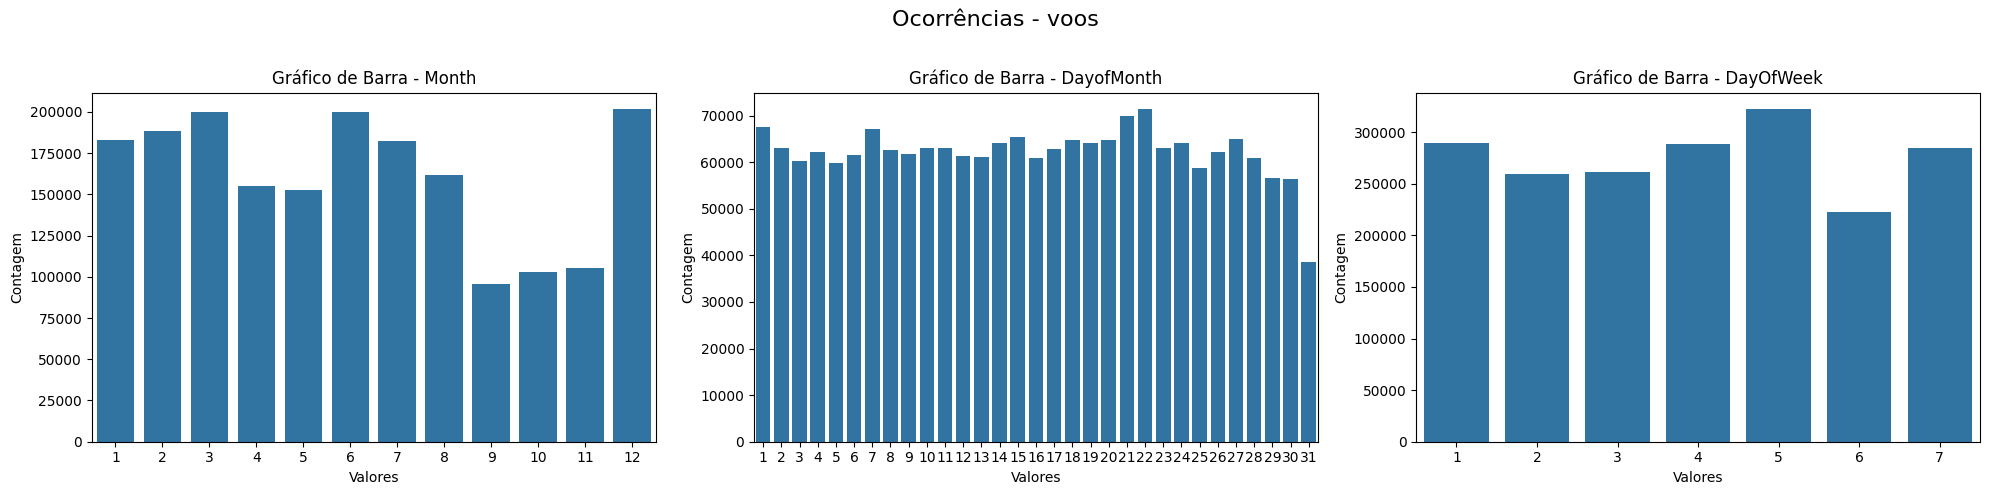

In [25]:
# Criar gráficos de barra para variáveis discretas
fig, axs =plt.subplots(1,3, figsize = (20,5))

for i, ax in zip(lista_var_discretas, axs.flatten()):
    sns.countplot(x=i, data=df_discreta[[i]], ax=ax)
    ax.set_title(f'Gráfico de Barra - {i}')
    ax.set_xlabel('Valores')
    ax.set_ylabel('Contagem')

# Adiciona um título geral acima dos subgráficos
fig.suptitle('Ocorrências - voos', fontsize=16)

# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o espaço para acomodar o título geral

# Exibe a figura
plt.show()

Também acho que devemos tratar algumas variavéis. Excluir alguns outliers, como em ArrDelay, DepDelay, AirDelay. Podemos tratar aquelas com desvio mais alto. Excluir dados considerando os quartis.


In [18]:
# Pensei em tratar apenas a coluna ArrDelay e DepDelay

In [26]:
quartis_personalizados = [0.90,0.95,0.96,0.97,0.98,0.99,1.00]
voos_n_cancelados['ArrDelay'].describe(percentiles=quartis_personalizados)

count    1.928363e+06
mean     4.219973e+01
std      5.678466e+01
min     -1.090000e+02
50%      2.400000e+01
90%      1.060000e+02
95%      1.480000e+02
96%      1.620000e+02
97%      1.800000e+02
98%      2.070000e+02
99%      2.560000e+02
100%     2.461000e+03
max      2.461000e+03
Name: ArrDelay, dtype: float64

In [27]:
colunas = ['ArrDelay', 'DepDelay']
percentis_98 = voos_n_cancelados[colunas].describe(percentiles=[0.98]).loc['98%']
df_s_outliers = voos_n_cancelados[(voos_n_cancelados[colunas] <= percentis_98).all(axis=1)]
df_s_outliers

,Month,DayofMonth,DayOfWeek,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,0,0.0,0.0,0.0,0.0,0.0
1,1,3,4,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,0,0.0,0.0,0.0,0.0,0.0
2,1,3,4,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,0,0.0,0.0,0.0,0.0,0.0
3,1,3,4,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,0,2.0,0.0,0.0,0.0,32.0
4,1,3,4,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,12,13,6,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,0,3.0,0.0,0.0,0.0,22.0
1936754,12,13,6,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,0,0.0,57.0,18.0,0.0,0.0
1936755,12,13,6,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,0,1.0,0.0,19.0,0.0,79.0
1936756,12,13,6,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,0,0.0,0.0,0.0,0.0,0.0


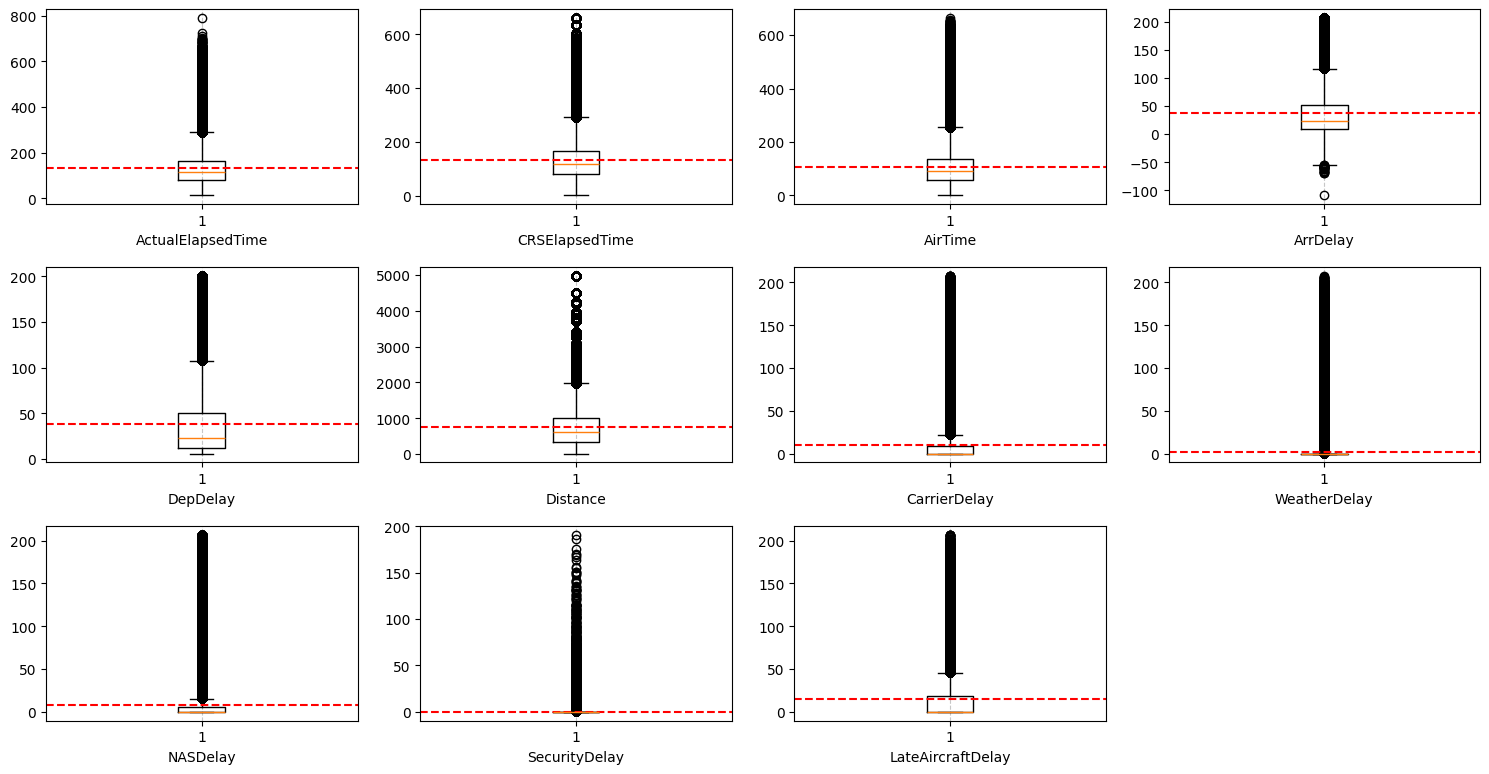

In [28]:
fig = plt.figure(figsize = (15,10))

for i, col in enumerate(df_continua):
    plt.subplot(4,4,i+1)
    plt.boxplot(df_s_outliers[col])
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.axhline(y=df_s_outliers[col].mean(), linestyle='--', color="red")
    
plt.tight_layout()     
plt.show()

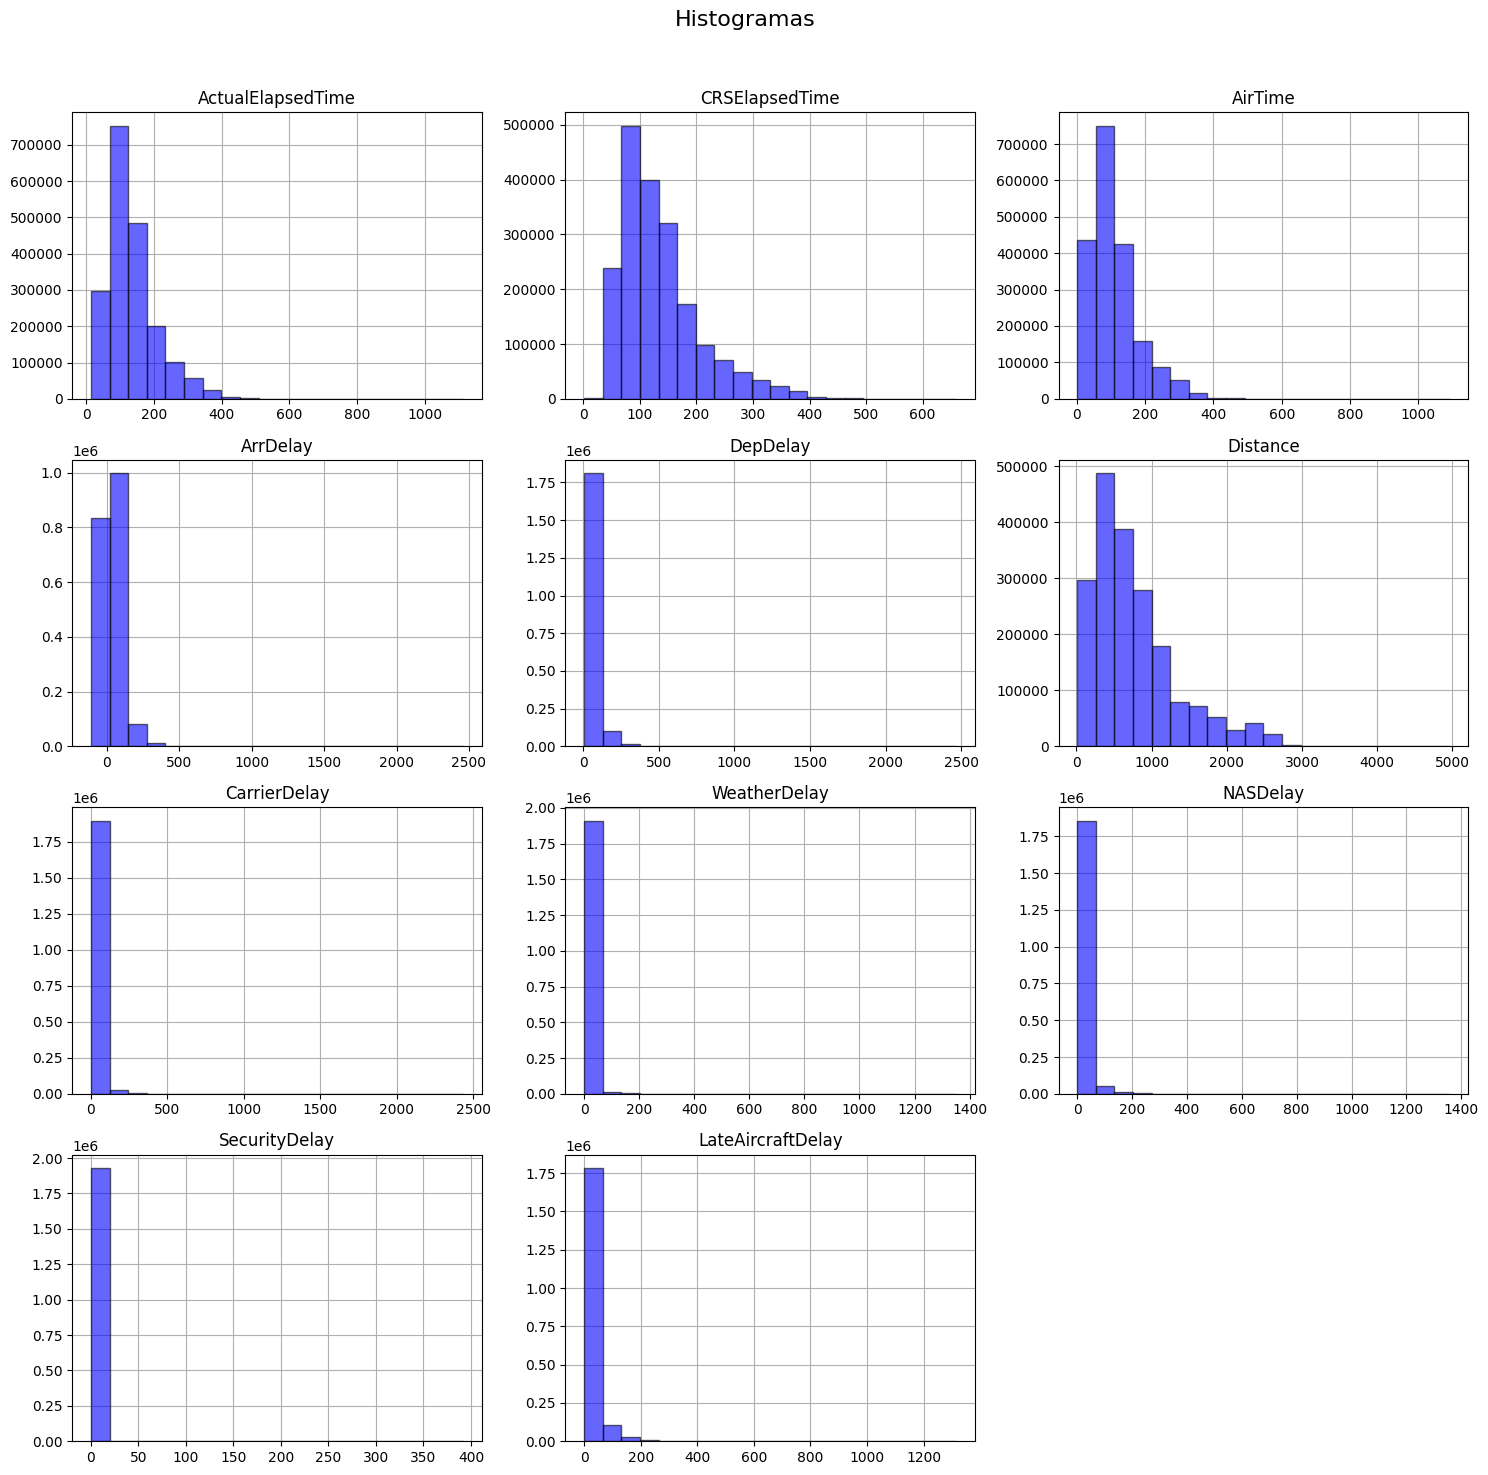

In [29]:
# Criação do grid de subgráficos 4x4
fig, axs = plt.subplots(4, 3, figsize=(15, 15))


for i, ax in zip(lista_var_continuas, axs.flatten()):
    df_continua[i].hist(bins=20, color='blue', edgecolor='black', alpha=0.6, ax=ax, zorder=4)
    ax.set_title(f'{i}')

axs.flatten()[11].axis('off')

# Adiciona um título geral acima dos subgráficos
fig.suptitle('Histogramas', fontsize=16, zorder=1)  # Definindo zorder para o título geral

# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o espaço para acomodar o título geral

plt.show()

In [30]:
df_num = voos_n_cancelados.select_dtypes(include=['int64', 'float64'])
df_num.corr()

,Month,DayofMonth,DayOfWeek,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Month,1.000000,0.058981,0.000051,0.002683,0.006594,0.000854,-0.000893,0.004237,0.005205,NaN,-0.003853,0.003655,0.004762,-0.002922,-0.001773
DayofMonth,0.058981,1.000000,0.017084,-0.000880,-0.000235,-0.000243,0.004132,0.005281,-0.000055,NaN,-0.001778,0.000320,0.003350,-0.000357,0.005526
DayOfWeek,0.000051,0.017084,1.000000,0.003073,0.004749,0.004737,0.006122,0.008720,0.007977,NaN,0.007093,0.004173,-0.005993,0.003657,0.005559
ActualElapsedTime,0.002683,-0.000880,0.003073,1.000000,0.971123,0.976663,0.068130,0.018491,0.952980,NaN,0.017630,0.007230,0.148137,0.005644,-0.012889
CRSElapsedTime,0.006594,-0.000235,0.004749,0.971123,1.000000,0.986089,-0.015676,0.006834,0.981967,NaN,0.008483,-0.017577,0.023852,0.003566,-0.024126
AirTime,0.000854,-0.000243,0.004737,0.976663,0.986089,1.000000,-0.000185,-0.002751,0.980297,NaN,0.010825,-0.016280,0.044198,0.005266,-0.022232
ArrDelay,-0.000893,0.004132,0.006122,0.068130,-0.015676,-0.000185,1.000000,0.952927,-0.029853,NaN,0.545015,0.277743,0.450761,0.011167,0.556649
DepDelay,0.004237,0.005281,0.008720,0.018491,0.006834,-0.002751,0.952927,1.000000,-0.007850,NaN,0.568513,0.262803,0.312030,0.009039,0.578594
Distance,0.005205,-0.000055,0.007977,0.952980,0.981967,0.980297,-0.029853,-0.007850,1.000000,NaN,0.007620,-0.024186,-0.000333,0.004050,-0.026353
Diverted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


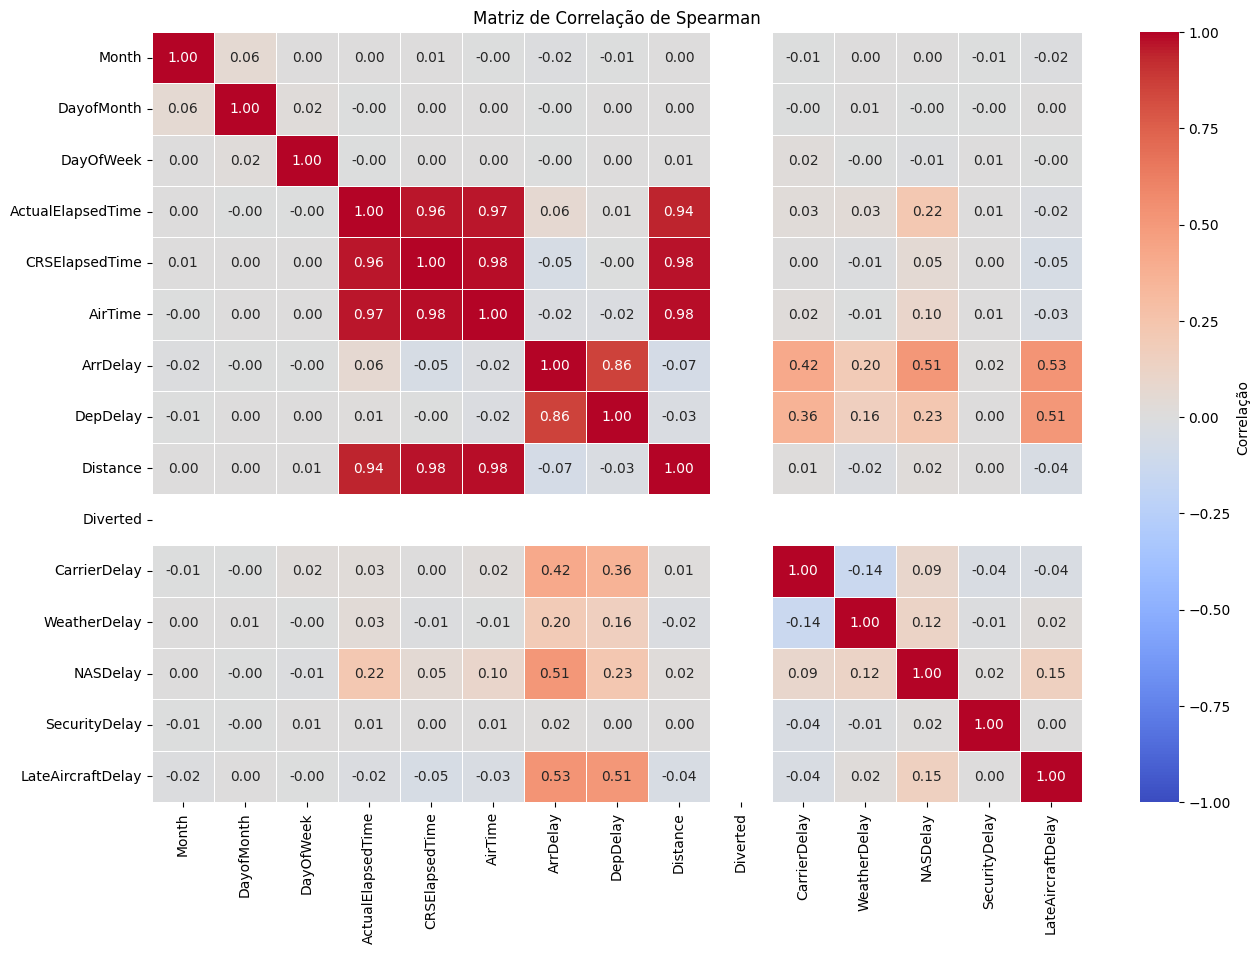

In [31]:
# Ajustando o tamanho do gráfico
plt.figure(figsize=(15, 10))

# Criando a matriz de correlação de Spearman
corr_matrix = df_num.corr(method="spearman")

# Customizando o heatmap com Seaborn
sns.heatmap(corr_matrix, annot=True, 
            cmap="coolwarm", # cores de azul até vermelho
            vmin=-1, vmax=1,  # Valores máximos e mínimos da barra de cor
            fmt=".2f", linewidths=.5, 
            cbar_kws={"label": "Correlação"})

# Adicionando título
plt.title("Matriz de Correlação de Spearman")

# Exibindo o gráfico
plt.show()

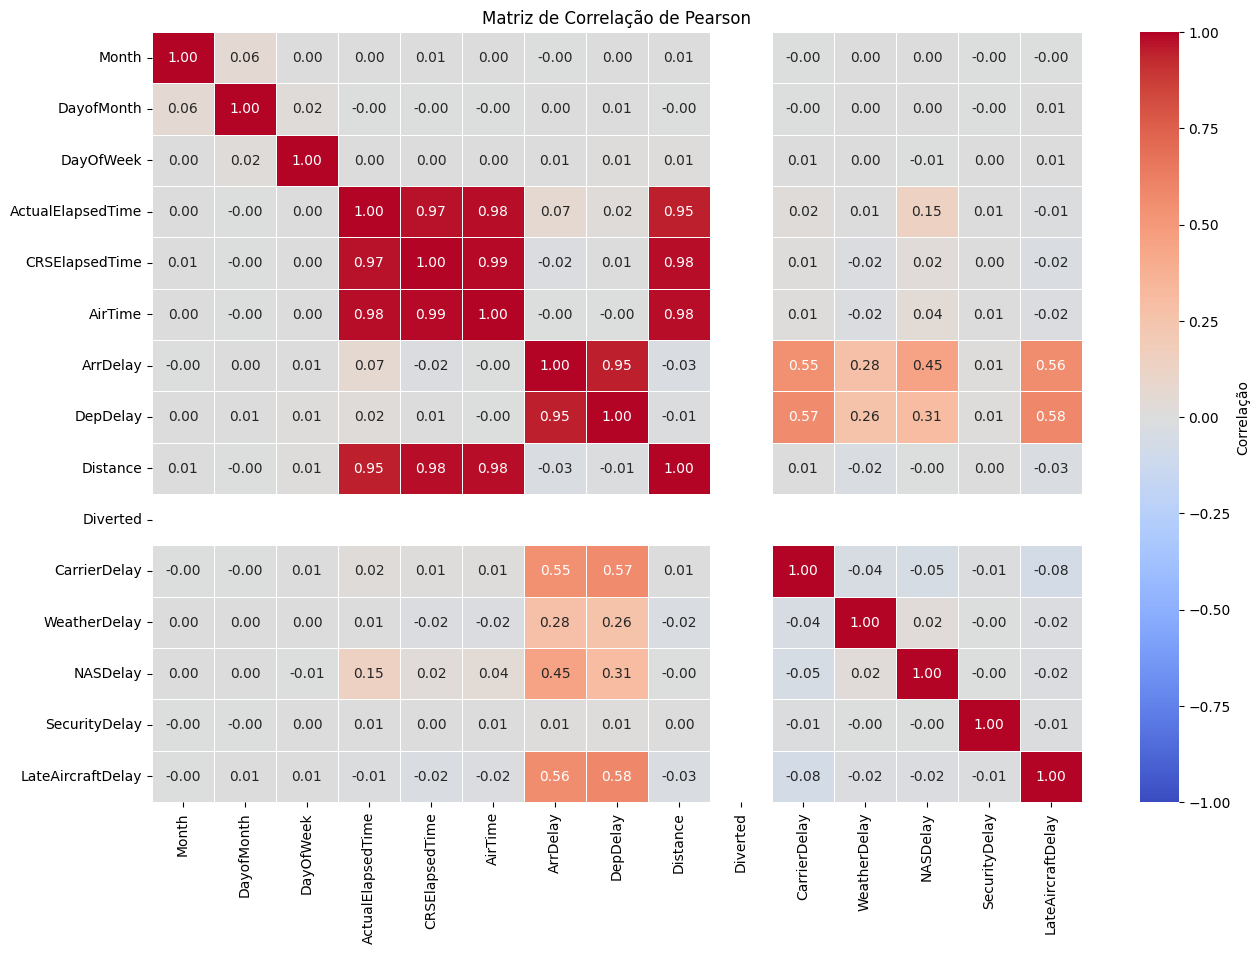

In [32]:
# Ajustando o tamanho do gráfico
plt.figure(figsize=(15, 10))

# Criando a matriz de correlação de Spearman
corr_matrix = df_num.corr(method="pearson")

# Customizando o heatmap com Seaborn
sns.heatmap(corr_matrix, annot=True, 
            cmap="coolwarm", # cores de azul até vermelho
            vmin=-1, vmax=1,  # Valores máximos e mínimos da barra de cor
            fmt=".2f", linewidths=.5, 
            cbar_kws={"label": "Correlação"})

# Adicionando título
plt.title("Matriz de Correlação de Pearson")

# Exibindo o gráfico
plt.show()

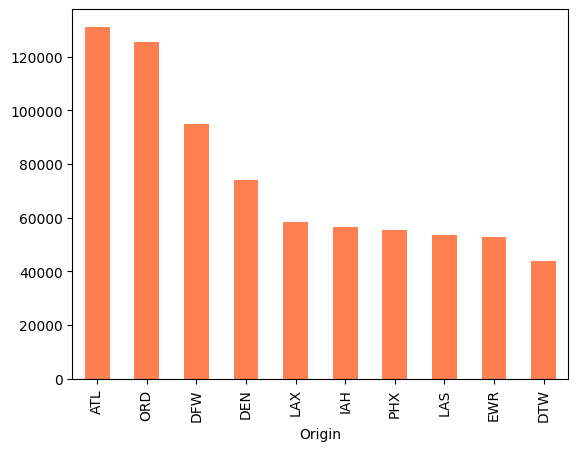

In [33]:
# Origem com mais registros
voos_n_cancelados['Origin'].value_counts().nlargest(10).plot(kind='bar', color='coral')
plt.show()

In [30]:
# Mais voos:
# Atlanta <-> Orlando

In [31]:
# Algumas sugestões:
# Analisar atrasos por semana ou mes
# Para onde são a maioria dos voos (ok)
# Tempo de voo 
# Pontualidade dos voos

## Por enquanto ignore tudo daqui para baixo... preciso verificar uns erros

# Análise de voos Desviados:

In [34]:
df_Desviados = voos_n_cancelados[voos_n_cancelados['Diverted'] == 1]

In [35]:
contagens_normalizadas = df_Desviados['Month'].value_counts()
print(contagens_normalizadas)

Series([], Name: count, dtype: int64)


voos cancelados em todos os meses do ano

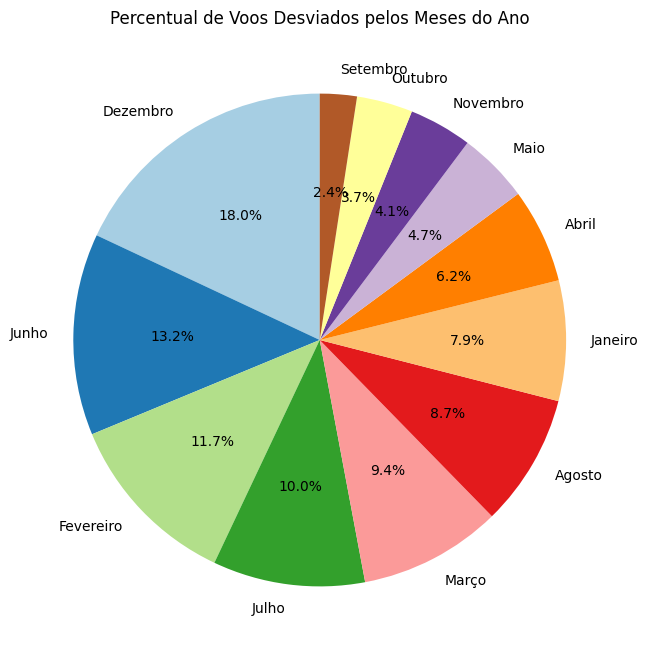

In [102]:
# colocanos na ordem apresentadas no value_counts
meses_do_ano = ['Dezembro', 'Junho', 'Fevereiro',
                'Julho','Março', 'Agosto', 'Janeiro',
                'Abril', 'Maio','Novembro','Outubro', 'Setembro']

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagens_normalizadas, labels=meses_do_ano, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentual de Voos Desviados pelos Meses do Ano')
plt.show()

In [103]:
contagens_normalizadas = df_Desviados['DayOfWeek'].value_counts(normalize=True) * 100
print(contagens_normalizadas)

DayOfWeek
2    15.978850
3    15.514573
5    15.153469
7    13.902502
1    13.464019
4    13.386639
6    12.599948
Name: proportion, dtype: float64


In [117]:
df['DifElapsedTime'] = df['ActualElapsedTime'] - df['CRSElapsedTime']

In [119]:
len(df[df['DifElapsedTime']>30]['DifElapsedTime']) # voos com mais de 30 minutos de atraso

82443

In [120]:
len(df[df['DifElapsedTime']<0]['DifElapsedTime']) # voos adiantados

1173740

In [121]:
df['DifElapsedTime'].describe(percentiles=[0.05,0.15,0.35,0.65,0.85,0.95])

count    1.928371e+06
mean    -8.918102e-01
std      1.723793e+01
min     -1.810000e+02
5%      -2.100000e+01
15%     -1.400000e+01
35%     -7.000000e+00
50%     -3.000000e+00
65%      1.000000e+00
85%      1.100000e+01
95%      2.800000e+01
max      7.590000e+02
Name: DifElapsedTime, dtype: float64

podemos observar uma grande amplitude entre o quantil de 95% e 100%, mostrando a grande amplitude no tempos de atrasos dos voos.

In [123]:
df_media_DifElapsedTime_mes = df.groupby('Month')['DifElapsedTime'].mean().reset_index()

In [132]:
df_media_DifElapsedTime_mes

,Month,DifElapsedTime
0,1,-0.674182
1,2,0.131557
2,3,-0.880559
3,4,-0.958619
4,5,-1.406238
5,6,0.767385
6,7,-0.637308
7,8,-2.202619
8,9,-3.026628
9,10,-3.402002


In [134]:
df_media_DifElapsedTime_dds = df.groupby('DayOfWeek')['DifElapsedTime'].mean().reset_index()
df_media_DifElapsedTime_dds

,DayOfWeek,DifElapsedTime
0,1,-1.399987
1,2,-0.141869
2,3,-0.883234
3,4,-0.551466
4,5,-0.415582
5,6,-2.018317
6,7,-1.070081


apesar de registro de atrasos de muitas horas, devido ao grande número de registros, a média fica em torno de zero minutos de atrasos, tanto na média de dias da semana, quando na média mensal.